In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter,ImageOps
from keras.preprocessing import image
import random
import cv2

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Reshape, LSTM, Bidirectional, TimeDistributed
import tensorflow as tf
import keras.backend as K

imageList = os.listdir('../dataset/LSTMData')

(50, 32)


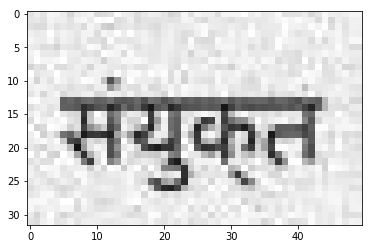

In [3]:
image2 = image.load_img("../dataset/LSTMData/"+imageList[1], color_mode="grayscale")
print(image2.size)
plt.imshow(image2, cmap='gray')

In [4]:
background = np.ones([32,180])*255
background.shape
background

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [5]:
img = np.array(image2)
(wt, ht) = (128, 32)
(h, w) = img.shape
fx = w / wt
fy = h / ht
f = max(fx, fy)
newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) # scale according to f (result at least 1 and at most wt or ht)
img = cv2.resize(np.array(img), newSize)
target = np.ones([ht, wt]) * 255
target[0:newSize[1], 0:newSize[0]] = img

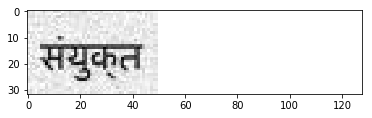

In [6]:
plt.imshow(target, cmap='gray')

Transpose

(128, 32)


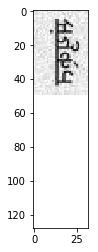

In [7]:
img = cv2.transpose(target)
print(img.shape)
plt.imshow(img, cmap='gray')

Normalize

(128, 32)


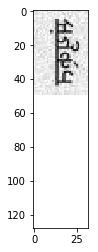

In [8]:
(m, s) = cv2.meanStdDev(img)
m = m[0][0]
s = s[0][0]
img = img - m
img = img / s if s>0 else img
plt.imshow(img, cmap='gray')
print(img.shape)

Loop through the image list to get truth text

In [9]:
a,b = imageList[0].split('_')
imageName = []
for image in imageList:
    name, extension = image.split('_')
    imageName.append(name)

In [56]:
kernelVals = [5, 5, 3, 3, 3]
featureVals = [1, 32, 64, 128, 128, 256]
strideVals = poolVals = [(2,2), (2,2), (1,2), (1,2), (1,2)]
numLayers = len(strideVals)
model = Sequential()
for i in range(numLayers):
    model.add(Conv2D(featureVals[i], (poolVals[i][0], poolVals[i][1]), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
           
numHidden = 256
inputSize = (None,4,1,128)
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM((numHidden), batch_input_shape=(4,None,128,1), return_sequences=True)))
model.add(Bidirectional(LSTM((numHidden), return_sequences=False)))


model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])


In [57]:
input_shape =(None,128,32,1)
model.build(input_shape)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 128, 32, 1)        5         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 64, 16, 1)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 64, 16, 32)        160       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 32, 8, 32)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 8, 64)         4160      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 4, 64)         0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 4, 128)        16512     
__________

In [30]:
numHidden = 256
inputSize = (None,4,128)
model.add(Bidirectional(LSTM((numHidden), batch_input_shape=(None,4,128), return_sequences=True)))
model.add(Bidirectional(LSTM((numHidden), return_sequences=True)))


ValueError: Output tensors to a Sequential must be the output of a Keras `Layer` (thus holding past layer metadata). Found: None